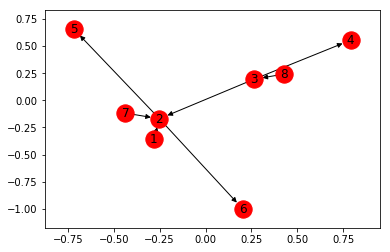

In [113]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 6), (2, 5), (3, 2), (7, 2), (3, 4), (8, 3)])
nx.draw_networkx(G)

In [48]:
degrees = dict(G.in_degree())
degrees

{1: 0, 2: 3, 3: 1, 4: 1, 5: 1, 6: 1, 7: 0, 8: 0}

In [49]:
degree_values = sorted(set(degrees.values()))

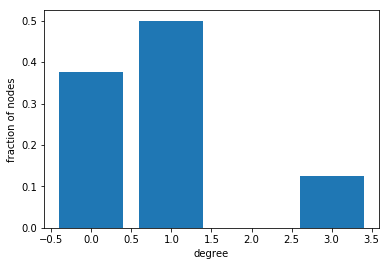

In [67]:
histogram = [len([key for key, val in degrees.items() if val == i])/nx.number_of_nodes(G) for i in degree_values]
plt.bar(degree_values, histogram)
plt.xlabel("degree")
plt.ylabel("fraction of nodes")
plt.show()

### Preferential Attachment in NetworkX
#### Demonstrate PowerLaw using barabasi_albert_graph()

In [70]:
G = nx.barabasi_albert_graph(1000000, 1)
degree = G.degree()

In [72]:
degree = dict(degree)

In [81]:
degree_values = sorted(set(degree.values()))
max(degree_values)

1581

In [83]:
histogram = [len([key for key, val in degree.items() if val == i])/nx.number_of_nodes(G) for i in degree_values]

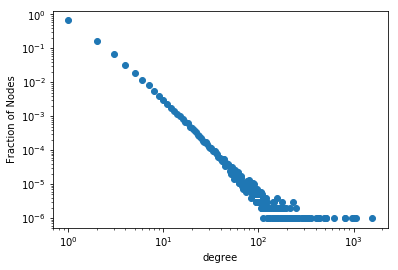

In [84]:
plt.figure()
plt.plot(degree_values, histogram, 'o')
plt.ylabel('Fraction of Nodes')
plt.xlabel('degree')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [86]:
G1 = nx.DiGraph()
G1.add_edges_from([('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'D'), ('B', 'C'), ('D', 'E'), ('E', 'C')])

In [87]:
G.in_degree()

InDegreeView({'A': 2, 'B': 1, 'C': 3, 'D': 1, 'E': 1})

In [89]:
nx.number_of_edges(G)

8

In [90]:
G = nx.Graph()
G.add_edges_from([('A', 'D'), ('A', 'E'), ('A', 'C'), ('C', 'G'), ('E', 'D'), ('D', 'H'), ('D', 'G'), ('D', 'B'), ('E', 'H'), ('F', 'H')])

In [96]:
[(e[0], e[1], len(list(nx.common_neighbors(G, e[0], e[1])))) for e in nx.non_edges(G)]

[('E', 'G', 1),
 ('E', 'C', 1),
 ('E', 'F', 1),
 ('E', 'B', 1),
 ('F', 'B', 0),
 ('F', 'D', 1),
 ('F', 'G', 0),
 ('F', 'A', 0),
 ('F', 'C', 0),
 ('H', 'G', 1),
 ('H', 'C', 0),
 ('H', 'A', 2),
 ('H', 'B', 1),
 ('B', 'G', 1),
 ('B', 'C', 0),
 ('B', 'A', 1),
 ('D', 'C', 2),
 ('G', 'A', 2)]

In [97]:
list(nx.jaccard_coefficient(G))

[('E', 'G', 0.25),
 ('E', 'C', 0.25),
 ('E', 'F', 0.3333333333333333),
 ('E', 'B', 0.3333333333333333),
 ('F', 'B', 0.0),
 ('F', 'D', 0.2),
 ('F', 'G', 0.0),
 ('F', 'A', 0.0),
 ('F', 'C', 0.0),
 ('H', 'G', 0.25),
 ('H', 'C', 0.0),
 ('H', 'A', 0.5),
 ('H', 'B', 0.3333333333333333),
 ('B', 'G', 0.5),
 ('B', 'C', 0.0),
 ('B', 'A', 0.3333333333333333),
 ('D', 'C', 0.4),
 ('G', 'A', 0.6666666666666666)]

In [98]:
list(nx.resource_allocation_index(G))

[('E', 'G', 0.2),
 ('E', 'C', 0.3333333333333333),
 ('E', 'F', 0.3333333333333333),
 ('E', 'B', 0.2),
 ('F', 'B', 0),
 ('F', 'D', 0.3333333333333333),
 ('F', 'G', 0),
 ('F', 'A', 0),
 ('F', 'C', 0),
 ('H', 'G', 0.2),
 ('H', 'C', 0),
 ('H', 'A', 0.5333333333333333),
 ('H', 'B', 0.2),
 ('B', 'G', 0.2),
 ('B', 'C', 0),
 ('B', 'A', 0.2),
 ('D', 'C', 0.8333333333333333),
 ('G', 'A', 0.7)]

In [99]:
list(nx.preferential_attachment(G))

[('E', 'G', 6),
 ('E', 'C', 6),
 ('E', 'F', 3),
 ('E', 'B', 3),
 ('F', 'B', 1),
 ('F', 'D', 5),
 ('F', 'G', 2),
 ('F', 'A', 3),
 ('F', 'C', 2),
 ('H', 'G', 6),
 ('H', 'C', 6),
 ('H', 'A', 9),
 ('H', 'B', 3),
 ('B', 'G', 2),
 ('B', 'C', 2),
 ('B', 'A', 3),
 ('D', 'C', 10),
 ('G', 'A', 6)]

In [102]:
#A, B, C, D, G} and {E, F, H}
G.node['A']['community']=0
G.node['B']['community']=0
G.node['C']['community']=0
G.node['D']['community']=0
G.node['G']['community']=0
G.node['E']['community']=1
G.node['F']['community']=1
G.node['H']['community']=1

In [103]:
G.nodes(data=True)

NodeDataView({'A': {'community': 0}, 'D': {'community': 0}, 'E': {'community': 1}, 'C': {'community': 0}, 'G': {'community': 0}, 'H': {'community': 1}, 'B': {'community': 0}, 'F': {'community': 1}})

In [104]:
list(nx.ra_index_soundarajan_hopcroft(G))

[('E', 'G', 0),
 ('E', 'C', 0),
 ('E', 'F', 0.3333333333333333),
 ('E', 'B', 0),
 ('F', 'B', 0),
 ('F', 'D', 0),
 ('F', 'G', 0),
 ('F', 'A', 0),
 ('F', 'C', 0),
 ('H', 'G', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('H', 'B', 0),
 ('B', 'G', 0.2),
 ('B', 'C', 0),
 ('B', 'A', 0.2),
 ('D', 'C', 0.8333333333333333),
 ('G', 'A', 0.7)]

In [105]:
list(nx.cn_soundarajan_hopcroft(G))

[('E', 'G', 1),
 ('E', 'C', 1),
 ('E', 'F', 2),
 ('E', 'B', 1),
 ('F', 'B', 0),
 ('F', 'D', 1),
 ('F', 'G', 0),
 ('F', 'A', 0),
 ('F', 'C', 0),
 ('H', 'G', 1),
 ('H', 'C', 0),
 ('H', 'A', 2),
 ('H', 'B', 1),
 ('B', 'G', 2),
 ('B', 'C', 0),
 ('B', 'A', 2),
 ('D', 'C', 4),
 ('G', 'A', 4)]

In [108]:
G1 = nx.watts_strogatz_graph(1000, 6, 0.04)
print(nx.average_clustering(G1))
print(nx.average_shortest_path_length(G1))

0.532226190476196
8.26336936936937


In [109]:
G1 = nx.watts_strogatz_graph(1000, 8, 0.04)
print(nx.average_clustering(G1))
print(nx.average_shortest_path_length(G1))

0.5722809523809521
6.600724724724725


In [110]:
G1 = nx.watts_strogatz_graph(1000, 10, 0.04)
print(nx.average_clustering(G1))
print(nx.average_shortest_path_length(G1))

0.5926398046398037
5.588532532532533


In [ ]:
somelist = [[1, 2, 3], [4, 5, 6]]
fig, subplt = plt.subplots(2, 1, figsize=(8, 9))
for g in zip(somelist, subplt):
    g[1].plot(nx.draw_networkx(g[0]))